# Harvest Date Prediction Model 



# Dataset Preparation

In this section, we are going to use the "coordinates" that we have obtained from the file "Data Analysis (Wing Lam)" to help us set up a new dataset called "no. of days" and "height" for our model training later. We have also imported data from a farm in HK (IoT project), which has provided us the air temperature, humidity and luminosity for finding the correlation between these parameters and the plant's growth rate (based on height), such that we can set up a deep learning model for predicting "under what air temp + luminosity + humidity combination will the plant be harvested after e.g. 50 days".

*Note that some dataset are missing here*


### Winter plant growth rate data

   X Coordinate  Y Coordinate
0           0.0      0.000000
1           1.0      0.291163
2           2.0      0.618129
3           3.0      0.978239
4           4.0      1.368867
Column names: Index(['X Coordinate', 'Y Coordinate'], dtype='object')
   No. of days    Height
0          0.0  0.000000
1          1.0  0.291163
2          2.0  0.618129
3          3.0  0.978239
4          4.0  1.368867


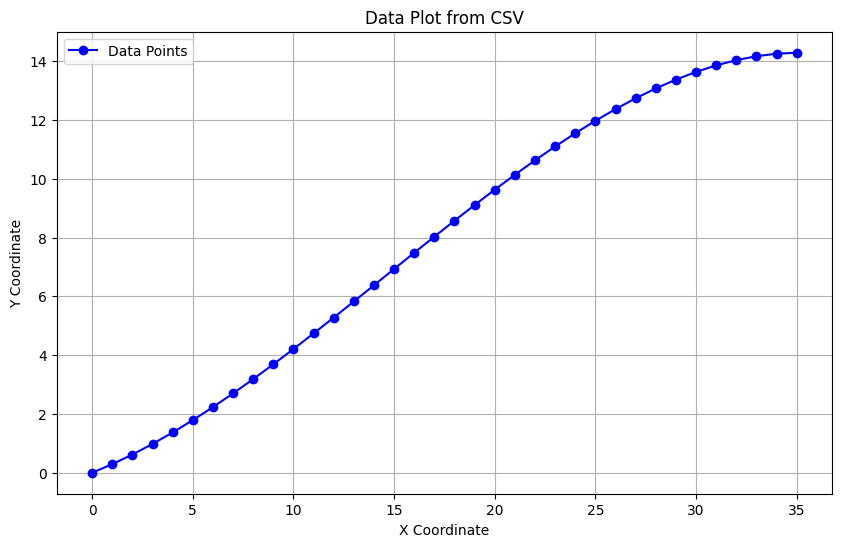

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Import the CSV file into a DataFrame
file_path = '/Users/y.s.lam/LettuceG/Datasets/Real plant growth rate curve (winter).csv' 
winterpgrdf = pd.read_csv(file_path)

print(winterpgrdf.head())
print("Column names:", winterpgrdf.columns)

# Assuming the original columns are 'X Coordinate' and 'Y Coordinate'
winterpgrdf.rename(columns={'X Coordinate': 'No. of days', 'Y Coordinate': 'Height'}, inplace=True)
print(winterpgrdf.head())

plt.figure(figsize=(10, 6))
plt.plot(winterpgrdf['No. of days'], winterpgrdf['Height'], marker='o', linestyle='-', color='b', label='Data Points')

plt.title('Winter Plant Growth Rate Data')
plt.xlabel('X Coordinate')  
plt.ylabel('Y Coordinate')  
plt.legend()
plt.grid(True)

plt.show()

### Summer plant growth rate data

   X Coordinate  Y Coordinate
0           0.0      0.000000
1           1.0      0.199929
2           2.0      0.417804
3           3.0      0.652691
4           4.0      0.903691
Column names: Index(['X Coordinate', 'Y Coordinate'], dtype='object')
   No. of days    Height
0          0.0  0.000000
1          1.0  0.291163
2          2.0  0.618129
3          3.0  0.978239
4          4.0  1.368867


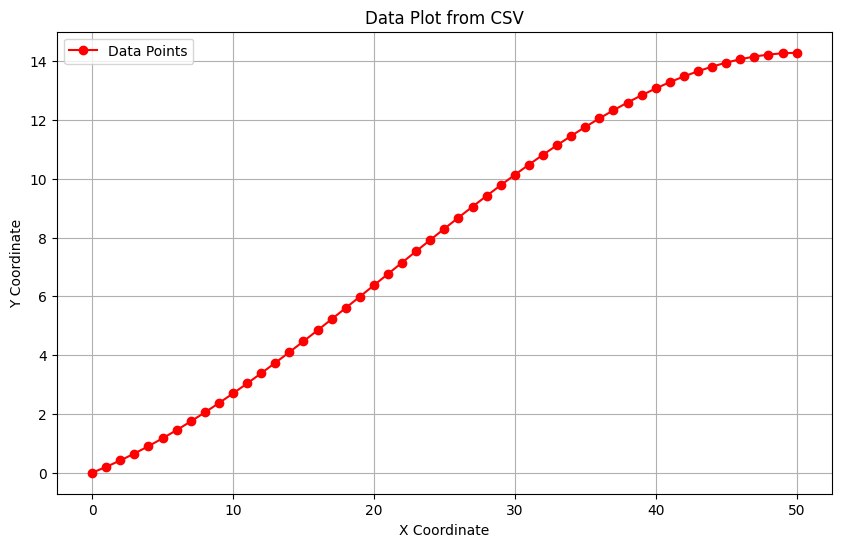

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/Users/y.s.lam/LettuceG/Datasets/Real plant growth rate curve (summer).csv' 
summerpgrdf = pd.read_csv(file_path)

print(summerpgrdf.head())
print("Column names:", summerpgrdf.columns)

summerpgrdf.rename(columns={'X Coordinate': 'No. of days', 'Y Coordinate': 'Height'}, inplace=True)
print(winterpgrdf.head())

plt.figure(figsize=(10, 6))
plt.plot(summerpgrdf['No. of days'], summerpgrdf['Height'], marker='o', linestyle='-', color='r', label='Data Points')


plt.title('Summer Plant Growth Rate Data')
plt.xlabel('X Coordinate')  
plt.ylabel('Y Coordinate')  
plt.legend()
plt.grid(True)


plt.show()

### Regression Model


Here, we used linear regression to make a multivariate regression model (with multiple independent variables). Due to the lack of record in the plant's increase in height per day, we have to "guess" and assign a "predicted harvest time needed" for each combination of air temp, humidity and luminosity (e.g. if it is 10 degree celsius, luminosity 8000 lux and humidity 70%, then the time needed for harvest would be 35 days, and if it is 41 degree celsius, 14000 lux luminosity and 81% humidity, then the time needed for harvest would be 50 days --> all of these are just arbitrary guesses that we have made based on the past experiences of the farmers: usually 35 days needed for winter and 50 days for summer)

For simplicity, we just used the hottest week and the coldest week as reference. 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

file_path = '/Users/y.s.lam/LettuceG/Datasets/Standardised PGR Dataset.csv'
data = pd.read_csv(file_path)
data = data.drop(['Unnamed: 0'], axis=1)

print(data)

# Handle missing values if any (e.g., drop rows with missing values)
data.dropna(inplace=True)

# Split the data into features and target
X = data[['AVG(airtemp)', 'AVG(humidity)', 'AVG(lux, *10^3)']]
y = data['harvest']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Use the model for predictions
# Example: Predicting 'harvest' for a new row with different values
new_data = pd.DataFrame({
    'AVG(airtemp)': [40.54316628],
    'AVG(humidity)': [80.89818611],
    'AVG(lux, *10^3)': [14.60888623]
})
predicted_harvest = model.predict(new_data)
print(f'Predicted harvest days: {predicted_harvest[0]}')

     AVG(airtemp)  AVG(humidity)  AVG(lux, *10^3)    harvest
0       11.130571      70.748143         8.006867  35.000000
1       11.284564      70.801284         8.041433  35.075377
2       11.438557      70.854426         8.075998  35.150754
3       11.592549      70.907568         8.110564  35.226131
4       11.746542      70.960709         8.145129  35.301508
..            ...            ...              ...        ...
195     41.159137      81.110752        14.747148  49.698492
196     41.313129      81.163894        14.781714  49.773869
197     41.467122      81.217036        14.816280  49.849246
198     41.621115      81.270177        14.850845  49.924623
199     41.775107      81.323319        14.885411  50.000000

[200 rows x 4 columns]
Mean Squared Error: 1.1042887681081592e-17
Predicted harvest days: 49.3969849262449


### Import air data

In [145]:
import pandas as pd

# Load and preprocess air data
file_path_air = '/Users/y.s.lam/LettuceG/Datasets/air-avg.csv' 
airdf = pd.read_csv(file_path_air)
airdf.rename(columns={'AVG(temp)': 'AVG(airtemp)'}, inplace=True)
airdf = airdf.drop(columns=['AVG(co2)'])
airdf = airdf.drop(range(185))
airdf['AVG(lux)'] = airdf['AVG(lux)'] / 1000
airdf.rename(columns={'AVG(lux)': 'AVG(lux, *10^3)'}, inplace=True)
#print(airdf.head())

# Load and preprocess water data
file_path_water = '/Users/y.s.lam/LettuceG/Datasets/water-avg.csv' 
waterdf = pd.read_csv(file_path_water)
waterdf.rename(columns={'AVG(temp)': 'AVG(watertemp)'}, inplace=True)
waterdf = waterdf.drop(range(8))
#print(waterdf.head())

# Merge the DataFrames on the common columns 'date_without_time' and 'day_or_night'
merged_df = pd.merge(airdf, waterdf, on=['date_without_time', 'day_or_night'], suffixes=('_air', '_water'))

# Specify the columns to move to the LHS
columns_to_move_lhs = ['date_without_time', 'day_or_night', 'AVG(airtemp)', 'AVG(watertemp)']

# Create the new column order
new_column_order = columns_to_move_lhs + [col for col in merged_df.columns if col not in columns_to_move_lhs]

# Reindex the DataFrame to reorder the columns
merged_df = merged_df.reindex(columns=new_column_order)
merged_df.rename(columns={'date_without_time': 'Date'}, inplace=True)

# Only keep the ones with day_or_night == 'day'
merged_df = merged_df[merged_df['day_or_night'] == 'day']

# Print the first few rows of the reordered DataFrame
merged_df.head()


,Date,day_or_night,AVG(airtemp),AVG(watertemp),AVG(humidity),"AVG(lux, *10^3)",AVG(do),AVG(ec),AVG(ph)
0,2023-10-01,day,32.420315,25.895535,71.097854,19.103853,8.363481,1211.537162,6.802539
2,2023-10-02,day,32.527611,25.846014,66.505150,19.675956,8.405486,1127.353844,6.912586
4,2023-10-03,day,34.013162,25.730215,66.193848,19.189720,8.407934,1170.317807,6.929986
6,2023-10-04,day,33.632904,25.831547,70.733333,20.338652,8.438582,1330.694983,6.944613
8,2023-10-05,day,32.744714,25.632286,64.233143,19.453939,8.459457,1255.979441,7.013143


In [146]:
# Save the merged and reordered DataFrame to a CSV file
merged_df.to_csv('/Users/y.s.lam/LettuceG/Datasets/Complete_air_and_water_dataset.csv', index=False)

Only keeping Airtemp, humidity and luminosity here

In [147]:
finalised_df = merged_df.drop(columns=['Date', 'day_or_night', 'AVG(watertemp)', 'AVG(do)', 'AVG(ec)', 'AVG(ph)'])
finalised_df.to_csv('/Users/y.s.lam/LettuceG/Datasets/cutdf.csv', index=False)

finalised_df

,AVG(airtemp),AVG(humidity),"AVG(lux, *10^3)"
0,32.420315,71.097854,19.103853
2,32.527611,66.505150,19.675956
4,34.013162,66.193848,19.189720
6,33.632904,70.733333,20.338652
8,32.744714,64.233143,19.453939
...,...,...,...
664,33.380687,67.123748,16.969946
666,36.556080,82.031045,12.795495
668,28.480830,89.396567,4.959871
670,28.929714,84.112286,8.685069


### Applying the Regression Model to Finalised_df

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the CSV file and train the model
file_path = '/Users/y.s.lam/LettuceG/Datasets/Standardised PGR Dataset.csv'
data = pd.read_csv(file_path)
data = data.drop(['Unnamed: 0'], axis=1)

# Preprocess the data
data.dropna(inplace=True)

# Split the data into features and target
X = data[['AVG(airtemp)', 'AVG(humidity)', 'AVG(lux, *10^3)']]
y = data['harvest']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the multivariate regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Predict 'days for harvest' for finalised_df
finalised_df = pd.read_csv('/Users/y.s.lam/LettuceG/Datasets/cutdf.csv')  # Load your finalised_df

# Ensure the finalised_df has the necessary columns
finalised_df.dropna(subset=['AVG(airtemp)', 'AVG(humidity)', 'AVG(lux, *10^3)'], inplace=True)

# Predict the 'days for harvest' for each row in finalised_df
finalised_df['days for harvest'] = model.predict(finalised_df[['AVG(airtemp)', 'AVG(humidity)', 'AVG(lux, *10^3)']])

# Check if the column is added
print(finalised_df.head())
print(finalised_df.columns)

# Save the updated finalised_df to a new CSV file
finalised_df.to_csv('/Users/y.s.lam/LettuceG/Datasets/finalised_df.csv', index=False)

saved_df = pd.read_csv('/Users/y.s.lam/LettuceG/Datasets/finalised_df.csv')
print(saved_df.head())
print(saved_df.columns)

Mean Squared Error: 1.1042887681081592e-17
   AVG(airtemp)  AVG(humidity)  AVG(lux, *10^3)  days for harvest
0     32.420315      71.097854        19.103853         44.484652
1     32.527611      66.505150        19.675956         43.953835
2     34.013162      66.193848        19.189720         44.586310
3     33.632904      70.733333        20.338652         44.970874
4     32.744714      64.233143        19.453939         43.769861
Index(['AVG(airtemp)', 'AVG(humidity)', 'AVG(lux, *10^3)', 'days for harvest'], dtype='object')
   AVG(airtemp)  AVG(humidity)  AVG(lux, *10^3)  days for harvest
0     32.420315      71.097854        19.103853         44.484652
1     32.527611      66.505150        19.675956         43.953835
2     34.013162      66.193848        19.189720         44.586310
3     33.632904      70.733333        20.338652         44.970874
4     32.744714      64.233143        19.453939         43.769861
Index(['AVG(airtemp)', 'AVG(humidity)', 'AVG(lux, *10^3)', 'days for 

### Preparing sliding windows

In [ ]:
import numpy as np

def ds_to_X_Y(ds, window_size=5):
    ds_as_np = ds.iloc[:, 1].to_numpy()  # Select only the second column
    X = []
    Y = []
    for i in range(len(ds_as_np) - window_size):
        row = ds_as_np[i:i + window_size]
        X.append(row)
        label = ds_as_np[i + window_size]
        Y.append(label)
    return np.array(X), np.array(Y).squeeze()

# Assuming ds is your DataFrame
WINDOW_SIZE = 5
X, Y = ds_to_X_Y(finalised_df, WINDOW_SIZE)
print(X.shape, Y.shape)

(331, 5) (331,)


# Building Neural Network

The aim for this neural network is to recognise the predicted time needed for harvest under different combinations of air temp + humidity + luminosity. We make this neural network by using CONV1D, which is a 1 dimensional CNN. If we treat those parameters as a bunch of vectors in 1D, we can basically use this to recognise it as a 1D graph pattern, thus giving us the predictions we wanted without using other methods like LSTM and RNN (should work better for multivariate cases). 

In [150]:
import numpy as np
import pandas as pd

def ds_to_X_Y(ds, window_size=3):
    ds_as_np = ds.to_numpy()  # Convert the entire DataFrame to a NumPy array
    X = []
    Y = []
    for i in range(len(ds_as_np) - window_size):
        row = ds_as_np[i:i + window_size, :-1]  # Select all columns except the last one for features
        X.append(row)
        label = ds_as_np[i + window_size, -1]  # Select the last column for the label
        Y.append(label)
    return np.array(X), np.array(Y).squeeze()

# Example usage
# Assuming summercdf is your DataFrame
WINDOW_SIZE = 3
features = ['AVG(airtemp)','AVG(humidity)', 'AVG(lux, *10^3)']
target = 'days for harvest'

# Create sequences
X, Y = ds_to_X_Y(finalised_df, WINDOW_SIZE)
print(X.shape, Y.shape)

(333, 3, 3) (333,)


In [151]:
X

array([[[32.42031474, 71.0978541 , 19.10385265],
        [32.52761088, 66.50515023, 19.67595565],
        [34.01316157, 66.19384834, 19.1897196 ]],

       [[32.52761088, 66.50515023, 19.67595565],
        [34.01316157, 66.19384834, 19.1897196 ],
        [33.63290406, 70.73333336, 20.33865236]],

       [[34.01316157, 66.19384834, 19.1897196 ],
        [33.63290406, 70.73333336, 20.33865236],
        [32.74471425, 64.23314294, 19.45393857]],

       ...,

       [[33.29198859, 66.82460658, 17.28167525],
        [33.38068673, 67.12374826, 16.96994564],
        [36.55607999, 82.03104476, 12.79549499]],

       [[33.38068673, 67.12374826, 16.96994564],
        [36.55607999, 82.03104476, 12.79549499],
        [28.48082978, 89.39656654,  4.95987124]],

       [[36.55607999, 82.03104476, 12.79549499],
        [28.48082978, 89.39656654,  4.95987124],
        [28.92971426, 84.11228577,  8.68506857]]])

In [152]:
Y

array([44.97087363, 43.7698612 , 42.32596719, 42.70379553, 42.58711032,
       42.99695496, 42.89179408, 42.20855499, 42.09262792, 43.10916172,
       41.90143206, 41.99838217, 41.66039967, 40.2256411 , 42.3089588 ,
       48.114566  , 43.32958683, 40.55506451, 41.28434691, 42.76208679,
       58.57466043, 43.35793737, 42.73659596, 43.56509047, 43.66501041,
       42.87992006, 44.23825905, 42.18816046, 43.6222508 , 42.82939699,
       43.11886347, 43.17500293, 43.49522544, 42.9568804 , 41.37041519,
       42.50284911, 43.10863243, 44.02464866, 43.53840228, 41.54853128,
       39.80717238, 40.47337862, 40.07526732, 40.36061879, 37.45603486,
       36.26312335, 37.8903193 , 39.25040644, 40.37985664, 40.99345287,
       43.25242134, 40.05550679, 39.45246525, 41.18487034, 40.71935283,
       39.34320599, 40.60359571, 42.55220549, 39.40579922, 38.93549669,
       39.82593875, 40.57850367, 40.63097671, 46.0872236 , 38.12200155,
       40.04989835, 42.1874031 , 42.48058275, 43.3171205 , 42.64

In [153]:
X_train, Y_train = X[:200], Y[:200]
X_val, Y_val= X[200:266], Y[200:266]
X_test, Y_test = X[266:], Y[266:]
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

((200, 3, 3), (200,), (66, 3, 3), (66,), (67, 3, 3), (67,))

In [154]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Assuming X and Y are your features and target arrays
# Split the data into training, validation, and test sets
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Check the shape of the input data before reshaping
print("Shapes before reshaping:")
print(f"X_train: {X_train.shape}, X_val: {X_val.shape}, X_test: {X_test.shape}")

# Reshape the data to fit the Conv1D input requirements
# Conv1D expects input shape (batch_size, steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], -1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], -1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], -1))

# Check the shape of the input data after reshaping
print("Shapes after reshaping:")
print(f"X_train: {X_train.shape}, X_val: {X_val.shape}, X_test: {X_test.shape}")

# Define the Conv1D model
model = Sequential([
    Conv1D(filters=16, kernel_size=3, activation='relu', padding='same', input_shape=(X_train.shape[1], X_train.shape[2])),
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    Flatten(),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, Y_train, epochs=500, validation_data=(X_val, Y_val), batch_size=16)

# Evaluate the model
loss = model.evaluate(X_test, Y_test)
print(f'Test Loss: {loss}')

# Predict the number of harvest days
predictions = model.predict(X_test)
print(predictions)

Shapes before reshaping:
X_train: (199, 3, 3), X_val: (67, 3, 3), X_test: (67, 3, 3)
Shapes after reshaping:
X_train: (199, 3, 3), X_val: (67, 3, 3), X_test: (67, 3, 3)
Epoch 1/500


/Users/y.s.lam/LettuceG/env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1263.9395 - val_loss: 37.0366
Epoch 2/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 90.3749 - val_loss: 14.5560
Epoch 3/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31.3699 - val_loss: 8.8723
Epoch 4/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.8877 - val_loss: 8.3823
Epoch 5/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.1414 - val_loss: 7.4602
Epoch 6/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.2113 - val_loss: 7.3476
Epoch 7/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.9746 - val_loss: 7.5008
Epoch 8/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.4022 - val_loss: 7.3219
Epoch 9/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.2437 - val_loss: 7.3091
Epoch 10/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.4805 - val_loss: 7.2038
Epoch 11/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.9200 - val_loss: 7.2397
Epoch 12/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 

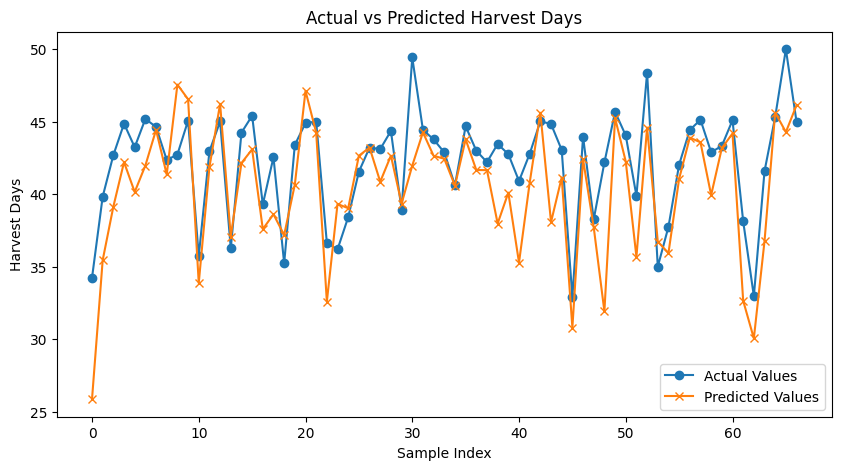

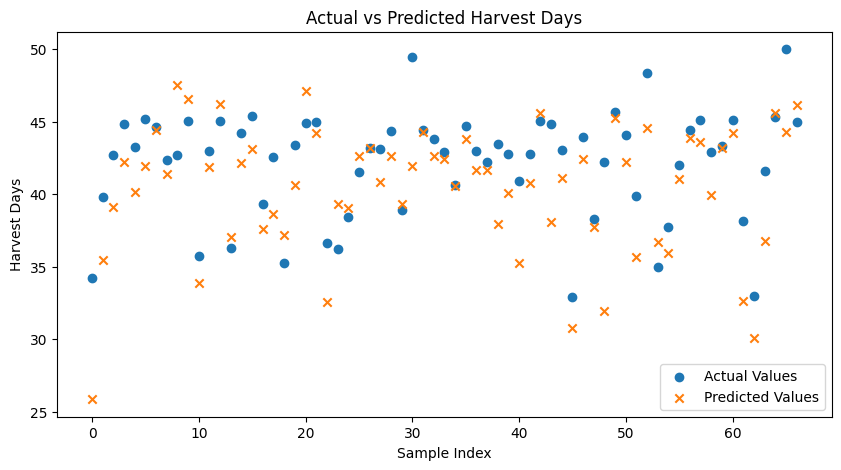

In [155]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(Y_test, label='Actual Values', marker='o')
plt.plot(predictions, label='Predicted Values', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Harvest Days')
plt.legend()
plt.title('Actual vs Predicted Harvest Days')
plt.show()

# Alternatively, you can use a scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(range(len(Y_test)), Y_test, label='Actual Values', marker='o')
plt.scatter(range(len(Y_test)), predictions, label='Predicted Values', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Harvest Days')
plt.legend()
plt.title('Actual vs Predicted Harvest Days')
plt.show()

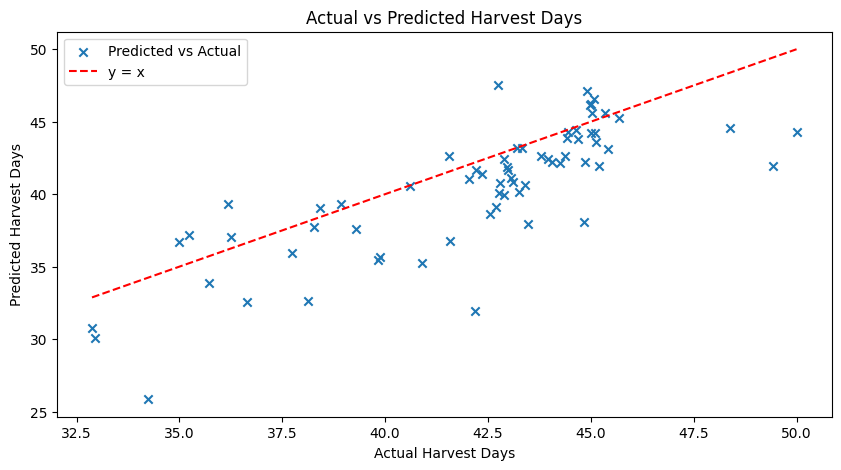

Mean Absolute Error (MAE): 2.4103807054057667
R-squared (R²) Score: 0.237327069981358


In [156]:
# Plot the actual vs predicted values with y = x line
plt.figure(figsize=(10, 5))
plt.scatter(Y_test, predictions, label='Predicted vs Actual', marker='x')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='y = x')
plt.xlabel('Actual Harvest Days')
plt.ylabel('Predicted Harvest Days')
plt.legend()
plt.title('Actual vs Predicted Harvest Days')
plt.show()

from sklearn.metrics import mean_absolute_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R-squared (R²) Score
r2 = r2_score(Y_test, predictions)
print(f'R-squared (R²) Score: {r2}')

## Improving Prediction Results

Epoch 1/500


/Users/y.s.lam/LettuceG/env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1762.7533 - val_loss: 1763.6392
Epoch 2/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1473.2808 - val_loss: 1701.3689
Epoch 3/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1047.0460 - val_loss: 1556.1184
Epoch 4/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 511.6456 - val_loss: 1279.1229
Epoch 5/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 170.0805 - val_loss: 975.5505
Epoch 6/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 115.1581 - val_loss: 817.1733
Epoch 7/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 76.2391 - val_loss: 695.4843
Epoch 8/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 83.9485 - val_loss: 568.0703
Epoch 9/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 58.5963 - val_loss: 459.4333
Epoch 10/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 84.8737 - val_loss: 356.2563
Epoch 11/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 56.4328 - val_loss: 281.3091
Epoch 12/500
13/13 ━━━━━━━━━

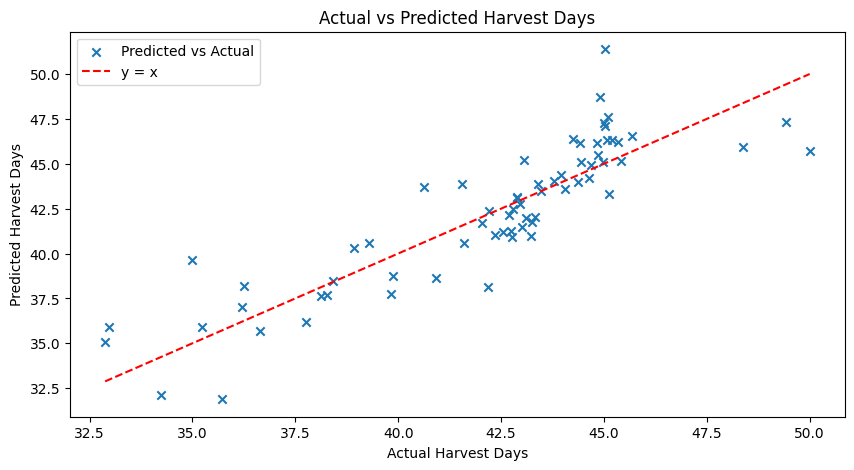

Mean Absolute Error (MAE): 1.5044464559188941
R-squared (R²) Score: 0.7169538785253806


In [157]:
from tensorflow.keras.layers import Dropout, BatchNormalization, Conv1D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, load_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_val_scaled = scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# Define the Conv1D model with additional layers, dropout, and batch normalization
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    BatchNormalization(),
    Dropout(0.2),
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.2),
    Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Model checkpoint callback
model_checkpoint = ModelCheckpoint('/Users/y.s.lam/LettuceG/Codes/LettuceG_model.keras', monitor='val_loss', save_best_only=True, mode='min')

# Train the model
history = model.fit(X_train_scaled, Y_train, epochs=500, validation_data=(X_val_scaled, Y_val), batch_size=16, callbacks=[model_checkpoint])

# Load the best model
best_model = load_model('/Users/y.s.lam/LettuceG/Codes/LettuceG_model.keras')

# Evaluate the best model
loss = best_model.evaluate(X_test_scaled, Y_test)
print(f'Test Loss: {loss}')

# Predict the number of harvest days
predictions = best_model.predict(X_test_scaled)
print(predictions)

# Plot the actual vs predicted values with y = x line
plt.figure(figsize=(10, 5))
plt.scatter(Y_test, predictions, label='Predicted vs Actual', marker='x')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label='y = x')
plt.xlabel('Actual Harvest Days')
plt.ylabel('Predicted Harvest Days')
plt.legend()
plt.title('Actual vs Predicted Harvest Days')
plt.show()

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R-squared (R²) Score
r2 = r2_score(Y_test, predictions)
print(f'R-squared (R²) Score: {r2}')

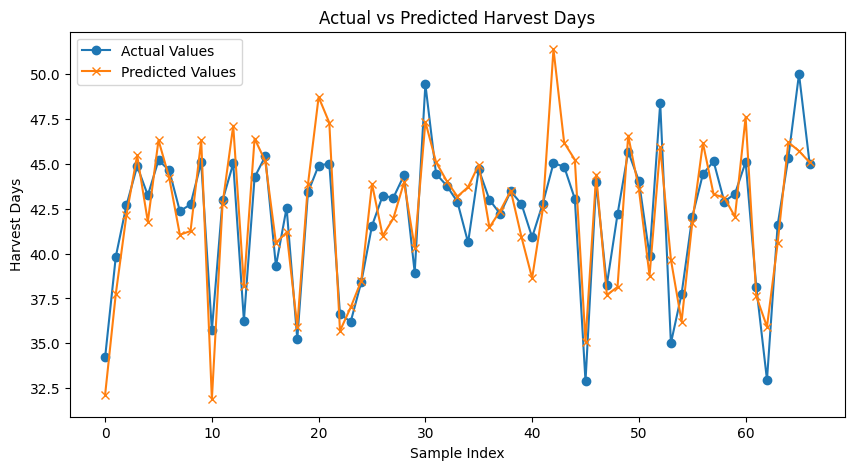

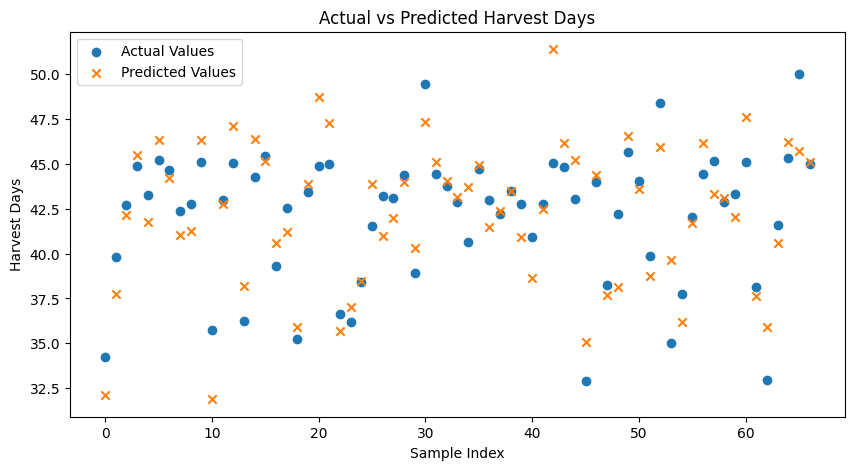

In [158]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(Y_test, label='Actual Values', marker='o')
plt.plot(predictions, label='Predicted Values', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Harvest Days')
plt.legend()
plt.title('Actual vs Predicted Harvest Days')
plt.show()

# Alternatively, you can use a scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(range(len(Y_test)), Y_test, label='Actual Values', marker='o')
plt.scatter(range(len(Y_test)), predictions, label='Predicted Values', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Harvest Days')
plt.legend()
plt.title('Actual vs Predicted Harvest Days')
plt.show()

In [159]:
import numpy as np

# Print the model summary to verify the expected input shape
best_model.summary()

# Yesterday's data (assuming you need to create a sequence of length 3)
# For demonstration, let's create a sequence with repeated values
# In practice, you should use actual sequential data
yesterdays_data = np.array([
    [10, 50, 8],
    [12, 60, 8.5],
    [11, 55, 8.25]
])

# Standardize yesterday's data using the same scaler used for training
yesterdays_data_scaled = scaler.transform(yesterdays_data)

# Check the shape of the scaled data
print(f'Scaled data shape: {yesterdays_data_scaled.shape}')

# Reshape the data to match the input shape expected by the model
# Assuming the model was trained with a sequence length of 3 and 3 features
yesterdays_data_scaled = yesterdays_data_scaled.reshape(1, yesterdays_data_scaled.shape[0], yesterdays_data_scaled.shape[1])

# Check the value of scaler used
print(scaler)

# Check the shape after reshaping
print(f'Reshaped data shape: {yesterdays_data_scaled.shape}')

# Predict the number of harvest days for today
todays_prediction = best_model.predict(yesterdays_data_scaled)
print(f'Predicted Harvest Days for Today: {todays_prediction[0][0]}')

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_48 (Conv1D)              │ (None, 3, 32)          │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 3, 32)          │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 3, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_49 (Conv1D)              │ (None, 3, 64)          │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 3, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_50 (Conv1D)              │ (None, 3, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 3, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169,605 (662.52 KB)

 Trainable params: 56,385 (220.25 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 112,772 (440.52 KB)

Scaled data shape: (3, 3)
StandardScaler()
Reshaped data shape: (1, 3, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted Harvest Days for Today: 33.66054916381836


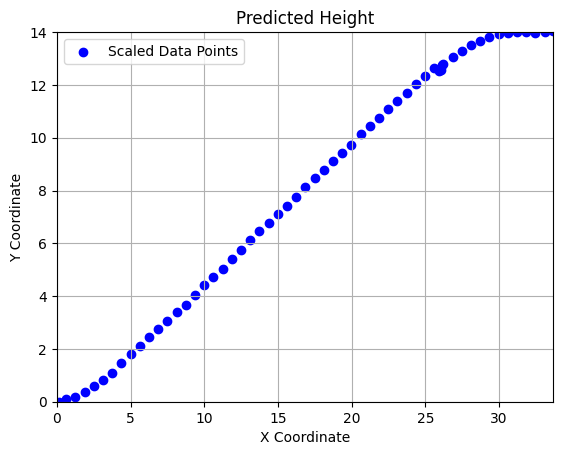

/var/folders/3j/2qkfdwhx5z7flwnvl1vz5yt40000gn/T/ipykernel_93670/3796532943.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_coords = list(range(int(np.ceil(todays_prediction))+1))


In [160]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Example usage with detected data points
data_points = [(2, 406), (10, 403), (20, 401), (30, 397), (40, 391), (50, 385), (60, 378), (70, 369), (80, 360), (90, 352),
               (100, 344), (110, 336), (120, 328), (130, 320), (140, 313), (150, 303), (160, 294), (170, 286), (180, 278),
               (190, 269), (200, 260), (210, 251), (220, 242), (230, 234), (240, 226), (250, 218), (260, 209), (270, 200),
               (280, 191), (290, 183), (300, 175), (310, 167), (320, 159), (330, 149), (340, 141), (350, 133), (360, 125),
               (370, 117), (380, 109), (390, 101), (400, 93), (410, 85), (415, 88), (417, 87), (418, 82), (420, 81), 
               (430, 75), (440, 69), (450, 63), (460, 59), (470, 55), (480, 53), (490, 52), (500, 51), (510, 51), (520, 52),
               (530, 51), (539, 50)] 

# Scale data points to fit within the new x and y ranges
refined_data_points = [(x / 539 * todays_prediction, y / 406 * 16) for x, y in data_points]

# Generate new x and y values from refined data points
new_x_values = [x for x, _ in refined_data_points]
new_y_values = [y for _, y in refined_data_points]

# Invert the y-values to convert the curve back
new_y_values = [16 - y for y in new_y_values]

# Create the plot
plt.scatter(new_x_values, new_y_values, label='Scaled Data Points', color='blue', marker='o')

# Set the x and y axis limits
plt.xlim(0, todays_prediction)
plt.ylim(0, 14)

# Set plot title and labels
plt.title('Predicted Height')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

# Add a grid
plt.grid(True)

# Add a legend
plt.legend()

# Display the plot
plt.show()

# Ensure the lengths of X and Y coordinates match
x_coords = list(range(int(np.ceil(todays_prediction))+1))
if len(x_coords) > len(new_y_values):
    x_coords = x_coords[:len(new_y_values)]
else:
    new_y_values = new_y_values[:len(x_coords)]

# Create a DataFrame from the new_x_values and new_y_values
data = {
    'X Coordinate': x_coords,
    'Y Coordinate': new_y_values
}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('/Users/y.s.lam/LettuceG/Datasets/Predicted heights.csv', index=False)